# Boosting

## AdaBoost

In [60]:
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Load breast cancer data
breastCancerFr = data.load_breast_cancer(as_frame=True).data
X = data.load_breast_cancer().data
y = data.load_breast_cancer(as_frame=True).target
breastCancerFr['y'] = y
breastCancerFr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


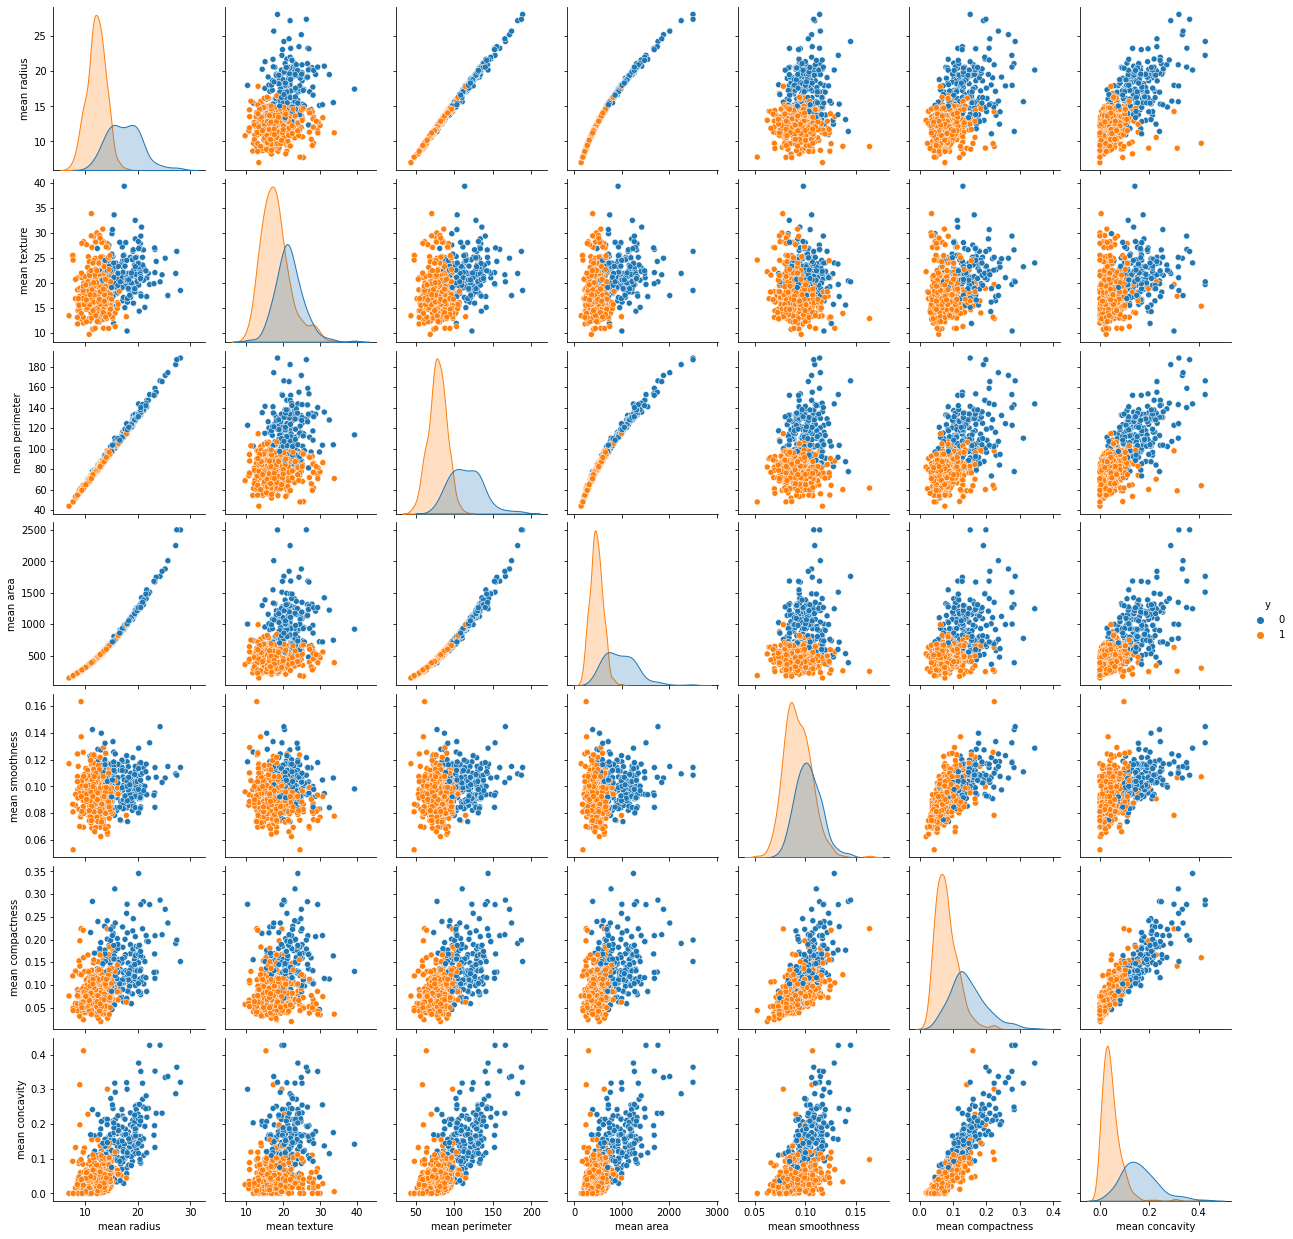

In [3]:
# Visualize some columns
sns.pairplot(breastCancerFr[['mean radius',
                             'mean texture',
                             'mean perimeter',
                             'mean area',
                             'mean smoothness',
                             'mean compactness',
                             'mean concavity',
                             'y']], hue='y');

In [4]:
# (Stratified) split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [5]:
# Create adaboost classifer object
# It uses decision trees of depth 1 by default but you can change it using the base_estimator parameter!
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Check performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [6]:
# Using SVM as a base classifier
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Check performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        64
           1       0.91      1.00      0.96       107

    accuracy                           0.94       171
   macro avg       0.96      0.92      0.94       171
weighted avg       0.95      0.94      0.94       171



## Gradient Boosting

In [21]:
# define the model
gbc = GradientBoostingClassifier(n_estimators = 100)

# Train gradient boosting Classifer
model = gbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Check performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



## Comparison

### Performance

In [61]:
abc = AdaBoostClassifier(n_estimators=100)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test) #Predict the response for test dataset
print("ADABOOST CLASSIFIER PERFORMANCE + CONFUSION")
print(classification_report(y_test, y_pred)) # Check performance
print(confusion_matrix(y_test, y_pred))

ADABOOST CLASSIFIER PERFORMANCE + CONFUSION
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 61   3]
 [  2 105]]


In [62]:
gbc = GradientBoostingClassifier(n_estimators=100)
model = gbc.fit(X_train, y_train)
y_pred = model.predict(X_test) #Predict the response for test dataset
print("GRADIENT BOOSTING CLASSIFIER PERFORMANCE")
print(classification_report(y_test, y_pred)) # Check performance
print(confusion_matrix(y_test, y_pred))

GRADIENT BOOSTING CLASSIFIER PERFORMANCE
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[ 58   6]
 [  5 102]]


In [64]:
rfc = RandomForestClassifier(n_estimators=100)
model = rfc.fit(X_train, y_train)
y_pred = model.predict(X_test) #Predict the response for test dataset
print("RANDOM FOREST CLASSIFIER PERFORMANCE")
print(classification_report(y_test, y_pred)) # Check performance
print(confusion_matrix(y_test, y_pred))

RANDOM FOREST CLASSIFIER PERFORMANCE
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

[[ 59   5]
 [  4 103]]


### Feature Importance

In [55]:
def get_feature_importance_names(f):
    x = list(zip(f, breastCancerFr.columns))
    x.sort(reverse = True, key = lambda e: e[0])
    return [e[1] for e in x]

print("MOST IMPORTANT FEATURES")
print(f"{'ADABOOST':<30}{'GRADIENT BOOSTING':<30}{'RANDOM FOREST':<30}")
print("\n".join(map(lambda e: f"{e[0]:<30}{e[1]:<30}{e[2]:<30}", 
    zip(get_feature_importance_names(abc.feature_importances_), 
        get_feature_importance_names(gbc.feature_importances_),
        get_feature_importance_names(rfc.feature_importances_)))))

MOST IMPORTANT FEATURES
ADABOOST                      GRADIENT BOOSTING             RANDOM FOREST                 
worst area                    mean concave points           worst perimeter               
mean texture                  worst area                    worst area                    
worst smoothness              worst concave points          worst concave points          
mean concave points           worst texture                 mean concave points           
area error                    worst perimeter               worst radius                  
worst texture                 worst fractal dimension       mean concavity                
concavity error               worst smoothness              worst concavity               
worst concavity               radius error                  mean area                     
smoothness error              worst concavity               mean perimeter                
worst concave points          mean concavity                mean r

## Hyperparameter tuning

In [74]:
# (Stratified) split dataset into training, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

Text(0, 0.5, 'Error')

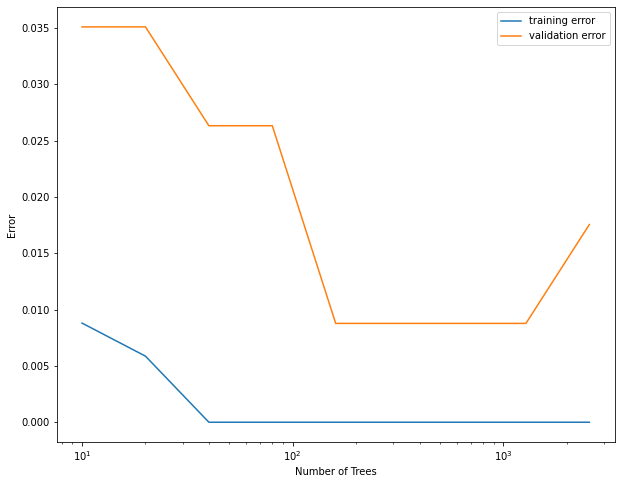

In [83]:
num_trees = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
models = map(lambda n: GradientBoostingClassifier(n_estimators=n), num_trees)
scores = {"val_err" : [], "train_err" : []}
for m in models:
    m.fit(X_train, y_train)
    scores["val_err"].append(1 - m.score(X_val, y_val))
    scores["train_err"].append(1 - m.score(X_train, y_train))

plt.semilogx(num_trees, scores["train_err"])
plt.semilogx(num_trees, scores["val_err"])
plt.legend(["training error", "validation error"])
plt.xlabel("Number of Trees")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

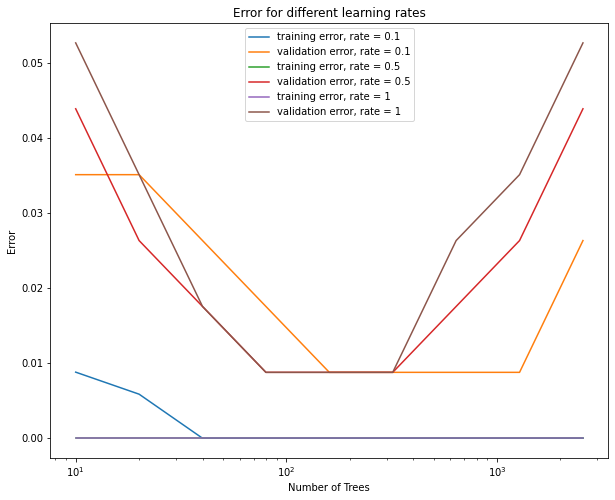

In [93]:
num_trees = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
learning_rates = [0.1, 0.5, 1]
scores = {}
for r in learning_rates: scores[r] = {"val_err" : [], "train_err" : []}

legend_strings = []
for r in learning_rates:
    for n in num_trees:
        m = GradientBoostingClassifier(n_estimators=n, learning_rate=r)
        m.fit(X_train, y_train)
        scores[r]["val_err"].append(1 - m.score(X_val, y_val))
        scores[r]["train_err"].append(1 - m.score(X_train, y_train))
    plt.semilogx(num_trees, scores[r]["train_err"])
    plt.semilogx(num_trees, scores[r]["val_err"])
    legend_strings.append(f"training error, rate = {r}")
    legend_strings.append(f"validation error, rate = {r}")
    

plt.legend(legend_strings)
plt.title("Error for different learning rates")
plt.xlabel("Number of Trees")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

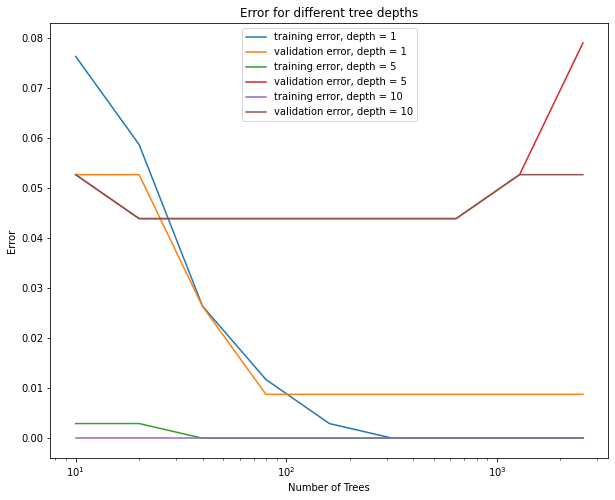

In [92]:
num_trees = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
max_depths = [1, 5, 10]
scores = {}
for d in max_depths: scores[d] = {"val_err" : [], "train_err" : []}

legend_strings = []
for d in max_depths:
    for n in num_trees:
        m = GradientBoostingClassifier(n_estimators=n, max_depth=d)
        m.fit(X_train, y_train)
        scores[d]["val_err"].append(1 - m.score(X_val, y_val))
        scores[d]["train_err"].append(1 - m.score(X_train, y_train))
    plt.semilogx(num_trees, scores[d]["train_err"])
    plt.semilogx(num_trees, scores[d]["val_err"])
    legend_strings.append(f"training error, depth = {d}")
    legend_strings.append(f"validation error, depth = {d}")
    

plt.legend(legend_strings)
plt.title("Error for different tree depths")
plt.xlabel("Number of Trees")
plt.ylabel("Error")

## hyperparameter tuning via cross validation

### Choosing sample size

>0.1 0.956 (0.023)
>0.2 0.959 (0.025)
>0.3 0.963 (0.023)
>0.4 0.961 (0.024)
>0.5 0.965 (0.024)
>0.6 0.961 (0.023)
>0.7 0.963 (0.025)
>0.8 0.961 (0.024)
>0.9 0.961 (0.026)
>1.0 0.961 (0.027)


Text(0, 0.5, 'Accuracy')

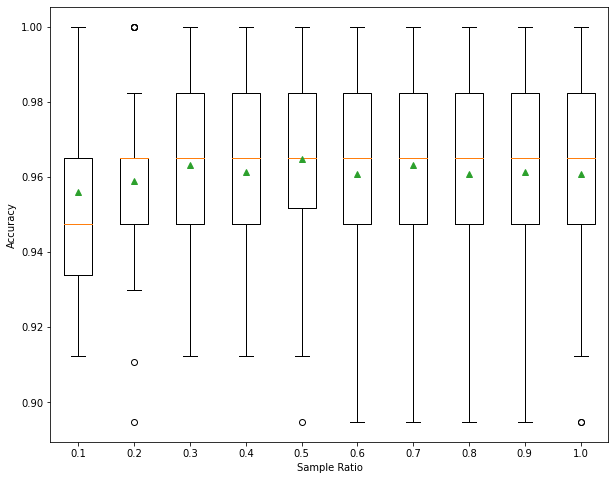

In [58]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore sample ratio from 10% to 100% in 10% increments
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = GradientBoostingClassifier(subsample=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores



# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel("Sample Ratio")
plt.ylabel("Accuracy")

### Choosing # trees

>10 0.942 (0.030)
>50 0.956 (0.029)
>100 0.962 (0.027)
>500 0.967 (0.021)
>1000 0.967 (0.023)
>5000 0.957 (0.027)


Text(0, 0.5, 'Accuracy')

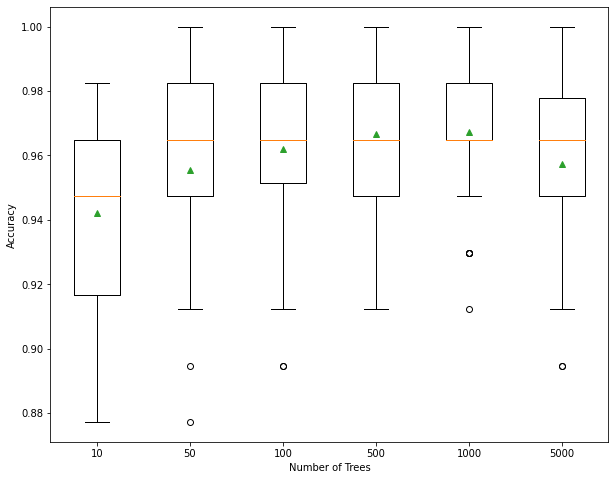

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")

### Choosing # features that are used in building a tree

>1 0.965 (0.024)
>2 0.966 (0.024)
>3 0.968 (0.024)
>4 0.967 (0.024)
>5 0.968 (0.025)
>6 0.963 (0.023)
>7 0.967 (0.024)
>8 0.964 (0.027)
>9 0.966 (0.026)
>10 0.965 (0.024)
>11 0.965 (0.024)
>12 0.964 (0.022)
>13 0.965 (0.025)
>14 0.964 (0.027)
>15 0.964 (0.027)
>16 0.963 (0.025)
>17 0.964 (0.026)
>18 0.964 (0.026)
>19 0.962 (0.026)
>20 0.963 (0.027)


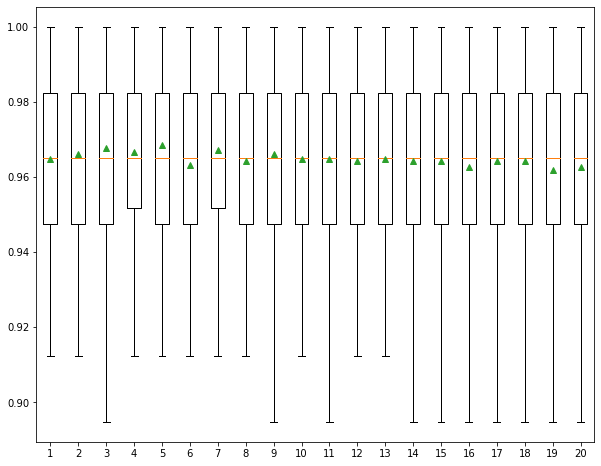

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 20
    for i in range(1,21):
        models[str(i)] = GradientBoostingClassifier(max_features=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True);

### Choosing learning rate

>0.0001 0.627 (0.007)
>0.0010 0.627 (0.007)
>0.0100 0.943 (0.030)
>0.1000 0.961 (0.028)
>1.0000 0.967 (0.023)


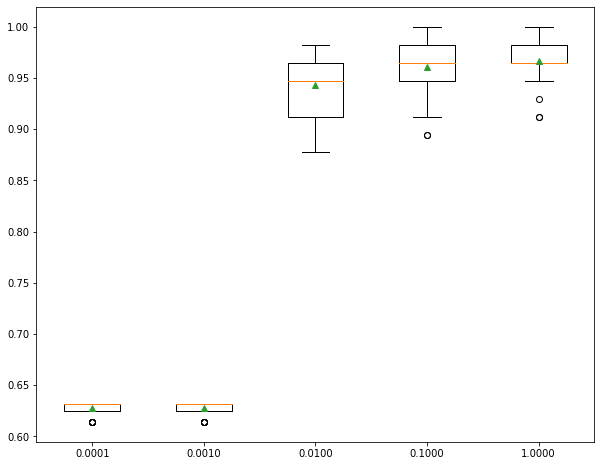

In [11]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define learning rates to explore
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = '%.4f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True);

### Choosing tree depth

>1 0.962 (0.024)
>2 0.960 (0.022)
>3 0.963 (0.026)
>4 0.960 (0.031)
>5 0.944 (0.031)
>6 0.937 (0.027)
>7 0.936 (0.038)
>8 0.934 (0.033)
>9 0.935 (0.031)
>10 0.932 (0.033)


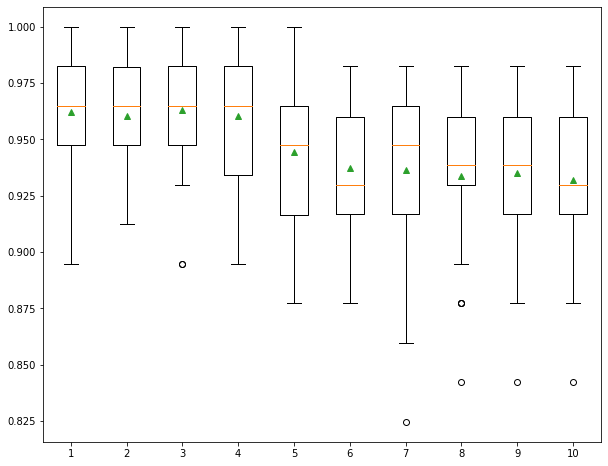

In [12]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define max tree depths to explore between 1 and 10
    for i in range(1,11):
        models[str(i)] = GradientBoostingClassifier(max_depth=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True);

### Grid search for hyperparameters (The following cell takes very long to compute!)

In [13]:
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970155 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.5}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.627412 (0.006966) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.627412 (0.006966) with: {'learning_rate': 0.0001,